# Ejemplo 1. Correlación.

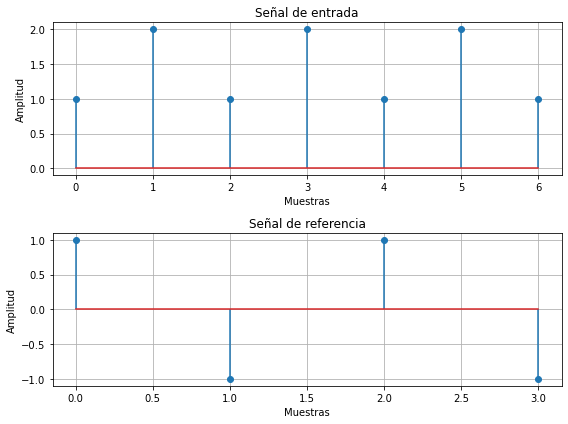

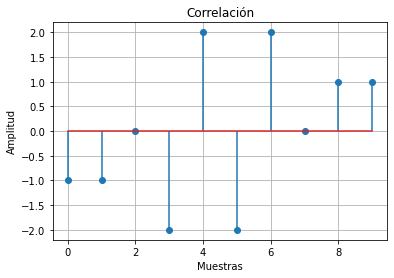

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Señal de entrada
x = np.array([1, 2, 1, 2, 1, 2, 1])

# Señal de referencia
y = np.array([1, -1, 1, -1])

# Correlación
corr = np.correlate(x, y, mode='full')

# Gráficas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Señal de entrada
ax1.stem(x, use_line_collection=True)
ax1.set_title('Señal de entrada')
ax1.set_xlabel('Muestras')
ax1.set_ylabel('Amplitud')
ax1.grid()

# Señal de referencia
ax2.stem(y, use_line_collection=True)
ax2.set_title('Señal de referencia')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Amplitud')
ax2.grid()

fig.tight_layout()
plt.show()

# Gráfica de la correlación
plt.stem(corr, use_line_collection=True)
plt.title('Correlación')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()


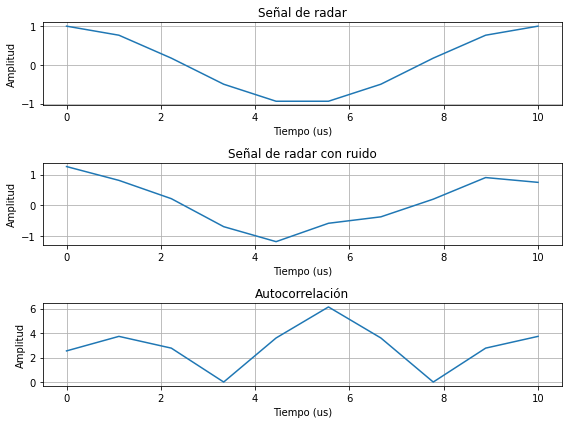

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del radar
fc = 10e6 # Frecuencia de operación
tau = 1e-6 # Duración del pulso
T = 10*tau # Duración de la señal
B = 2e6 # Ancho de banda

# Generación de la señal de radar
t = np.linspace(0, T, int(T/tau))
s = np.cos(2*np.pi*fc*t) * np.exp(-1j*np.pi*B*(t-tau/2)**2)

# Adición de ruido
snr = 10 # Relación señal-ruido
noise_power = np.abs(s)**2 / (10**(snr/10))
noise = np.random.normal(scale=np.sqrt(noise_power/2), size=s.shape)
x = s + noise

# Autocorrelación
corr = np.correlate(x, x, mode='same')

# Gráficas
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))

# Señal de radar
ax1.plot(t*1e6, np.real(s))
ax1.set_title('Señal de radar')
ax1.set_xlabel('Tiempo (us)')
ax1.set_ylabel('Amplitud')
ax1.grid()

# Señal de radar con ruido
ax2.plot(t*1e6, np.real(x))
ax2.set_title('Señal de radar con ruido')
ax2.set_xlabel('Tiempo (us)')
ax2.set_ylabel('Amplitud')
ax2.grid()

# Autocorrelación
ax3.plot(t*1e6, np.abs(corr))
ax3.set_title('Autocorrelación')
ax3.set_xlabel('Tiempo (us)')
ax3.set_ylabel('Amplitud')
ax3.grid()

fig.tight_layout()
plt.show()


En este código, definimos los parámetros del radar, incluyendo la frecuencia de operación fc, la duración del pulso tau, la duración de la señal T y el ancho de banda B. Luego, generamos una señal de radar s que consiste en un pulso de duración tau modulado en frecuencia por una onda sinusoidal de frecuencia fc. Para simular las reflexiones de la señal de radar, agregamos ruido gaussiano a la señal usando la relación señal-ruido (SNR) especificada.

A continuación, aplicamos la autocorrelación a la señal de radar con ruido para identificar la señal original. La autocorrelación es simplemente la correlación de una señal consigo misma. En este caso, estamos utilizando la función np.correlate() para calcular la autocorrelación.

Finalmente, graficamos la señal de radar original, la señal de radar con ruido y la autocorrelación. Podemos ver que la autocorrelación tiene un pico en el tiempo de retardo igual a la duración del pulso, lo que indica que la señal de radar original ha sido identificada. La autocorrelación se utiliza comúnmente en la detección de radar para identificar las señales de radar y distinguirlas del ruido y otras señales no deseadas.